In [21]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
reviews = pd.read_csv('reviews.csv',encoding='latin-1',delimiter="__")
reviews = list(reviews.columns)

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [w for w in tokens if w not in stop_words]
    preprocessed_text = " ".join(filtered_tokens)
    return preprocessed_text

preprocessed_reviews = [preprocess_text(review) for review in reviews]


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(review) for review in preprocessed_reviews]


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=15)
tfidf_matrix = vectorizer.fit_transform(preprocessed_reviews)
feature_names = vectorizer.get_feature_names_out()

In [26]:
from sklearn.decomposition import NMF

num_topics = 3
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)


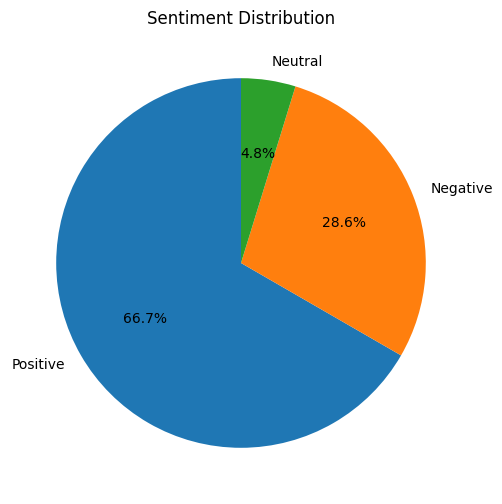

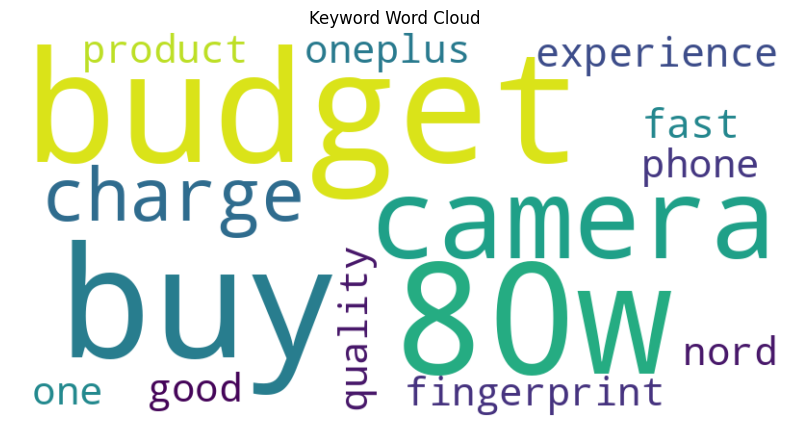

In [28]:
import matplotlib.pyplot as plt

# Sentiment Distribution Pie Chart
sentiment_counts = {
    "Positive": sum(1 for s in sentiments if s['compound'] >= 0.05),
    "Negative": sum(1 for s in sentiments if s['compound'] <= -0.05),
    "Neutral": sum(1 for s in sentiments if -0.05 < s['compound'] < 0.05)
}
labels = list(sentiment_counts.keys())
sizes = list(sentiment_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Sentiment Distribution")
plt.show()

from wordcloud import WordCloud

keyword_text = " ".join(feature_names)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(keyword_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Keyword Word Cloud")
plt.show()